# Justin Exploration Final Draft

# TEST EXPLORE.py

In [9]:
import justin_explore as ex

<div class="alert alert-success">


# Q1. Are there any specific words or word groups that can assist with identifying the Language JavaScript or Java over the other languages?

## A simple word count reveals that the word ```x``` is more prevalent in JavaScript than any other language.

In [10]:
ex.qmcbt_viz_01()

,JavaScript,C#,Java,Python,All
x,50,3,0,4,65


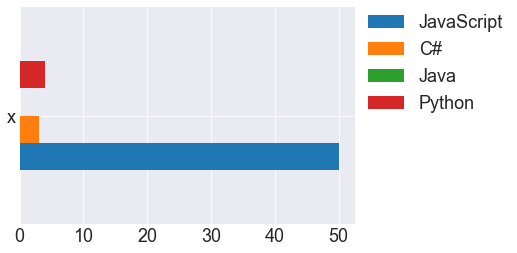

In [11]:
ex.qmcbt_viz_02()

## A simple word count reveals that the word ```planet``` is more prevalent in Java than any other language.

In [12]:
ex.qmcbt_viz_03()

,JavaScript,C#,Java,Python,All
planet,4,5,19,3,61


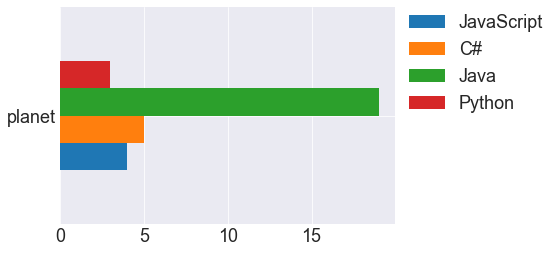

In [13]:
ex.qmcbt_viz_04()

## Using an Bi-Gram function reveals that the word pair ```bug, fixed``` has the highest occurance in the Readme files for JavaScript, this Bi-Gram does not appear in the top 20 of any other languages.

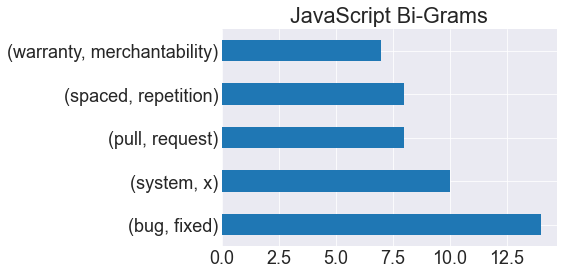

In [14]:
ex.qmcbt_viz_05()

<div class="alert alert-info">
    
# Q1. Are there any specific words or word groups that can assist with identifying the Language JavaScript or Java over the other languages?
    
### YES
* JavaScript
    * Single Word: ```'x'```
    * Bi-Gram: ```'bug, fixed'```
    * Tri-Gram: **NONE**
    
* Java
    * Single Word: ```'planet'```
    * Bi-Gram: **NONE**
    * Tri-Gram: **NONE**

    
### **The specific words and word-groups shown above appear to be good candidates for prediction of our target program language.** 
    * NOTE: There were no Bi-Gram or Tri-Gram groupings for Java that were used significantly more than all of the other languages.

<div class="alert alert-success">


# Q2. Is there a significant difference in Sentiment across all four languages? 

## Hypothesis

* two_tail
* four_sample
* **Anova Test**


* $𝐻_0$: The opposite of what I am trying to prove  
    * $H_{0}$: Sentiment **is NOT** ```significantly different``` across languages  
    * ```sentiment``` != ```language```  


* $𝐻_𝑎$: What am I trying to prove  
    * $H_{a}$: Sentiment **is** ```significantly different``` across languages  
    * ```sentiment``` == ```language```  

## Visualization

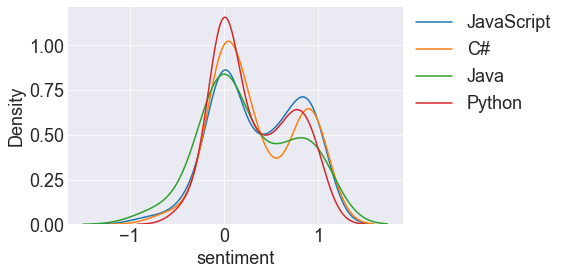

In [15]:
ex.qmcbt_viz_06()

## Statistical Test of Hypothesis

#### All Languages

In [16]:
ex.qmcbt_stat_01()

f_val: 0.4013359085711304
p_val: 0.7521678915596715
------------------------------
Fail to reject the null hypothesis


<div class="alert alert-info">
    
# Q2. Is there a significant difference in Sentiment across all four languages?
    
### NO
### The Sentiment **is NOT** ```significantly different``` across the four program languages.
    
    
### **There is no evidence to support that the Sentiment of each program language Readme file is significantly different and will have an impact in determinng the program language.**  
    
* Based on this statistical finding we believe that Sentiment would not be an integral feature and should not be included in any machine learning efforts going forward.

<div class="alert alert-danger">
    
# STOP
--- EXPORT ALL CELLS ABOVE FOR FINAL NOTEBOOK ---


### Imports:

In [17]:
import unicodedata
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import re
import json
import nltk
import requests
import pandas as pd
from bs4 import BeautifulSoup
from typing import Dict, List, Optional, Union, cast

## Plots, Graphs, & Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter



# ------------- #
# Local Imports #
# ------------- #

## importing sys
import sys

## adding 00_helper_files to the system path as First Location to look
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
## adding 03_projects Personal Work folder for current project to the system path as Second Location to look
sys.path.insert(1, '/Users/qmcbt/codeup-data-science/03_projects/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/justin_docs')
## adding 03_projects Root folder for current project to the system path as Third Location to look
sys.path.insert(2, '/Users/qmcbt/codeup-data-science/03_projects/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project')

## env containing sensitive access credentials
import env
from env import github_token, github_username

## Import Helper Modules
import acquire as ac
import prepare as pr
import modeling as m

In [18]:
# ------------- #
# Local Imports #
# ------------- #

## importing sys
import sys

## adding 00_helper_files to the system path as First Location to look
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
## adding 03_projects Personal Work folder for current project to the system path as Second Location to look
sys.path.insert(1, '/Users/qmcbt/codeup-data-science/03_projects/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/justin_docs')
## adding 03_projects Root folder for current project to the system path as Third Location to look
sys.path.insert(2, '/Users/qmcbt/codeup-data-science/03_projects/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project')

## env containing sensitive access credentials
import env
from env import github_token, github_username

## Import Helper Modules
import acquire as ac
import prepare as pr
import modeling as m

### Acquisition and Prep:

In [ ]:
#Acquires the cleaned data with our feature engineering included. still missing bag of words and ngrams.
df = pr.get_clean_df()

### Explore:

#### SPLIT

In [ ]:
# Split ~50/30/20
train, validate, test = pr.split_data(df, explore=True)

In [ ]:
# Check split
train.shape[0]/df.shape[0], validate.shape[0]/df.shape[0], test.shape[0]/df.shape[0]

In [ ]:
# Create word lists by language
def word_groups(df, target):
    """
    DESCRIPTION:
    This function creates DataFrames for each language,
    then creates word groups by breaking the lemmatized and clean columns into word lists by language.
    ___________________________________
    REQUIRED IMPORTS:
    import pandas as pd
    ___________________________________
    ARGUMENTS:
        df = DataFrame
    target = 'col_name' that you want to target
    ___________________________________
    RETURN:
               DataFrame by language - js_lang, cs_lang, jv_lang, py_lang, 
    Lemmatized word list by language - js_lem, cs_lem, jv_lem, py_lem, all_lem, 
         Clean word list by language - js_clean, cs_clean, jv_clean, py_clean, all_clean
    """
    # split languages into seperate DataFrames
    js_lang = df[df[target] == 'JavaScript']
    cs_lang = df[df[target] == 'C#']
    jv_lang = df[df[target] == 'Java']
    py_lang = df[df[target] == 'Python']
    
    # create word groups on lemmatized column 
    js_lem = (' '.join(js_lang[js_lang[target] == 'JavaScript']['lemmatized'])).split()
    cs_lem = (' '.join(cs_lang[cs_lang[target] == 'C#']['lemmatized'])).split()
    jv_lem = (' '.join(jv_lang[jv_lang[target] == 'Java']['lemmatized'])).split()
    py_lem = (' '.join(py_lang[py_lang[target] == 'Python']['lemmatized'])).split()
    all_lem = (' '.join(df['lemmatized'])).split()
    
    # create word groups on clean column
    js_clean = (' '.join(js_lang[js_lang[target] == 'JavaScript']['clean'])).split()
    cs_clean = (' '.join(cs_lang[cs_lang[target] == 'C#']['clean'])).split()
    jv_clean = (' '.join(jv_lang[jv_lang[target] == 'Java']['clean'])).split()
    py_clean = (' '.join(py_lang[py_lang[target] == 'Python']['clean'])).split()
    all_clean = (' '.join(df['clean'])).split()
    
    return js_lang, cs_lang, jv_lang, py_lang, js_lem, cs_lem, jv_lem, py_lem, all_lem, js_clean, cs_clean, jv_clean, py_clean, all_clean

In [ ]:
# Assign the returned variables from the word_groups Function
js_lang,cs_lang,jv_lang,py_lang,js_lem,cs_lem,jv_lem,py_lem,all_lem,js_clean,cs_clean,jv_clean,py_clean,all_clean = word_groups(train, 'language')

In [ ]:
def lem_freq():
    """
    DESCRIPTION:
    This function creates Series Lemmatized value counts for each language
    ___________________________________
    REQUIRED IMPORTS:
    import pandas as pd
    ___________________________________
    ARGUMENTS:
    None
    ___________________________________
    RETURN:
    Lemmatized Series by language - js_lem_freq, cs_lem_freq, jv_lem_freq, py_lem_freq, all_lem_freq
    """
    # Create frequency Series for lem
    js_lem_freq = pd.Series(js_lem).value_counts()
    cs_lem_freq = pd.Series(cs_lem).value_counts()
    jv_lem_freq = pd.Series(jv_lem).value_counts()
    py_lem_freq = pd.Series(py_lem).value_counts()
    all_lem_freq = pd.Series(all_lem).value_counts()
    
    return js_lem_freq, cs_lem_freq, jv_lem_freq, py_lem_freq, all_lem_freq

In [ ]:
# Assign the Series of Lemmatized value counts for each language  
js_lem_freq, cs_lem_freq, jv_lem_freq, py_lem_freq, all_lem_freq = lem_freq()

In [ ]:
def lem_word_counts():

    # Display lemmatized word count frequency by language
    lem_word_counts = pd.concat([js_lem_freq, cs_lem_freq, jv_lem_freq, py_lem_freq, all_lem_freq], 
                                axis=1).fillna(0).astype(int)
    lem_word_counts.columns = ['JavaScript','C#','Java', 'Python', 'All']
    return lem_word_counts

In [ ]:
# Assign Lemmatized word count
lem_word_counts = lem_word_counts()

In [ ]:
def lang_bi_gram():
    # Create Bi-Grams for each language
    js_2_gram = list(nltk.ngrams(js_lem, 2))
    cs_2_gram = list(nltk.ngrams(cs_lem, 2))
    jv_2_gram = list(nltk.ngrams(jv_lem, 2))
    py_2_gram = list(nltk.ngrams(py_lem, 2))
    all_2_gram = list(nltk.ngrams(all_lem, 2))
    
    return js_2_gram, cs_2_gram, jv_2_gram, py_2_gram, all_2_gram

In [ ]:
# Assign Bi-Grams for each language
js_2_gram, cs_2_gram, jv_2_gram, py_2_gram, all_2_gram = lang_bi_gram()

In [ ]:
def lang_3_gram():
    
    # Create N-Grams of 3N for each language
    js_3_gram = list(nltk.ngrams(js_lem, 3))
    cs_3_gram = list(nltk.ngrams(cs_lem, 3))
    jv_3_gram = list(nltk.ngrams(jv_lem, 3))
    py_3_gram = list(nltk.ngrams(py_lem, 3))
    all_3_gram = list(nltk.ngrams(all_lem, 3))
    
    return js_3_gram, cs_3_gram, jv_3_gram, py_3_gram, all_3_gram    

In [ ]:
# Assign Tri-Grams for each language
js_3_gram, cs_3_gram, jv_3_gram, py_3_gram, all_3_gram = lang_3_gram()

In [ ]:
def len_and_sentiment(df, target):

    # Create Variables for lemmatized length and sentiment for each language

    # JavaScript
    js_lem_length = df[df[target] == 'JavaScript'].lem_length
    js_sentiment = df[df[target] == 'JavaScript'].sentiment
    # C#
    cs_lem_length = df[df[target] == 'C#'].lem_length
    cs_sentiment = df[df[target] == 'C#'].sentiment
    # C#
    jv_lem_length = df[df[target] == 'Java'].lem_length
    jv_sentiment = df[df[target] == 'Java'].sentiment
    # C#
    py_lem_length = df[df[target] == 'Python'].lem_length
    py_sentiment = df[df[target] == 'Python'].sentiment
    # All
    all_lem_length = df.lem_length
    all_sentiment = df.sentiment

    return js_lem_length, js_sentiment, cs_lem_length, cs_sentiment, jv_lem_length, jv_sentiment, py_lem_length, py_sentiment, all_lem_length, all_sentiment

In [ ]:
# Assign Lemmatized Readme Length and Sentiment scores
js_lem_length, js_sentiment, cs_lem_length, cs_sentiment, jv_lem_length, jv_sentiment, py_lem_length, py_sentiment, all_lem_length, all_sentiment = len_and_sentiment(train, 'language')

<div class="alert alert-success">


# Q1. Are there any specific words or word groups that can assist with identifying the Language JavaScript or Java over the other languages?

## A simple word count reveals that the word ```x``` is more prevalent in JavaScript than any other language.

In [ ]:
# sort by one language
ex.lem_word_counts.sort_values(['JavaScript'], ascending=False)[1:2]

In [ ]:
# show highest over 'All' word count campared by language
plt.rc('font', size=18)
lem_word_counts.sort_values('JavaScript', 
                            ascending=False)[['JavaScript',
                                              'C#',
                                              'Java', 
                                              'Python']][1:2].plot.barh()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## A simple word count reveals that the word ```planet``` is more prevalent in Java than any other language.

In [ ]:
# sort by one language
lem_word_counts.sort_values(['Java'], ascending=False).head(1)

In [ ]:
# show highest over 'All' word count campared by language
plt.rc('font', size=18)
lem_word_counts.sort_values('Java', 
                            ascending=False)[['JavaScript',
                                              'C#',
                                              'Java', 
                                              'Python']][0:1].plot.barh()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Using an Bi-Gram function reveals that the word pair ```bug, fixed``` has the highest occurance in the Readme files for JavaScript, this Bi-Gram does not appear in the top 20 of any other languages.

In [ ]:
# Display top 5 bigram pairs for JavaScript lemmatized
pd.Series(js_2_gram).value_counts().head(5).plot.barh()
plt.title('JavaScript Bi-Grams')

<div class="alert alert-success">


# Q4. Is there a significant difference in Sentiment across all four languages? 

## Hypothesis

* two_tail
* four_sample
* **Anova Test**


* $𝐻_0$: The opposite of what I am trying to prove  
    * $H_{0}$: Sentiment **is NOT** ```significantly different``` across languages  
    * ```sentiment``` != ```language```  


* $𝐻_𝑎$: What am I trying to prove  
    * $H_{a}$: Sentiment **is** ```significantly different``` across languages  
    * ```sentiment``` == ```language```  

## Visualization

In [ ]:
# is the distribution for sentiment different for any of the languages

## setting basic style parameters for matplotlib
#plt.rc('figure', figsize=(13, 7))
plt.figsize=(13, 7)
plt.style.use('seaborn-darkgrid')

sns.kdeplot(js_sentiment, label = 'JavaScript')
sns.kdeplot(cs_sentiment, label = 'C#')
sns.kdeplot(jv_sentiment, label = 'Java')
sns.kdeplot(py_sentiment, label = 'Python')
plt.legend(['JavaScript', 'C#', 'Java', 'Python'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Statistical Test of Hypothesis

<div class="alert alert-warning">

# ANOVA $latex y_i = b_0+b_1X_{1,i} +…+b_{j-1,i} + e_i&s=2$
* ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. 
* Variance in the ANOVA is partitioned into total variance, variance due to groups, and variance due to individual differences.
* The ratio obtained when doing this comparison is known as the F-ratio. 
* A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design.

    
* As for all parametric tests the data need to be normally distributed (each group’s data should be roughly normally distributed) for the F-statistic to be reliable. 
* Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.

#### Assumptions:
As with all parametric tests also ANOVA has a number of assumptions. 
1. First of all, the groups have to be independent of each other. 
2. Second, the data needs to be normally distributed (within each group). 
3. Third, there have to be equal variances between all groups. 

Homogeneity of variances can be tested with [Bartlett’s and Levene’s test](https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/) in Python (e.g., using SciPy) and the normality assumption can be tested using the Shapiro-Wilks test or by examining the distribution. Note, if your data is skewed you can transform it using e.g. the [log transformation](https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/) in Python.



#### All Languages

In [ ]:
import scipy.stats as stats
alpha = α = 0.05

## stats f_oneway functions takes the groups as input and returns ANOVA F and p value
## Leammatized Length
f_val, p_val = stats.f_oneway(js_sentiment, cs_sentiment, jv_sentiment, py_sentiment)

print(f'f_val: {f_val}')
print(f'p_val: {p_val}')
print('------------------------------')

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### JavaScript

In [ ]:
import scipy.stats as stats
alpha = α = 0.05

## stats f_oneway functions takes the groups as input and returns ANOVA F and p value
## Leammatized Length
f_val, p_val = stats.f_oneway(js_sentiment, all_sentiment)

print(f'f_val: {f_val}')
print(f'p_val: {p_val}')
print('------------------------------')

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### C#

In [ ]:
import scipy.stats as stats
alpha = α = 0.05

## stats f_oneway functions takes the groups as input and returns ANOVA F and p value
## Leammatized Length
f_val, p_val = stats.f_oneway(cs_sentiment, all_sentiment)

print(f'f_val: {f_val}')
print(f'p_val: {p_val}')
print('------------------------------')

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### Java

In [ ]:
import scipy.stats as stats
alpha = α = 0.05

## stats f_oneway functions takes the groups as input and returns ANOVA F and p value
## Leammatized Length
f_val, p_val = stats.f_oneway(jv_sentiment, all_sentiment)

print(f'f_val: {f_val}')
print(f'p_val: {p_val}')
print('------------------------------')

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### Python

In [ ]:
import scipy.stats as stats
alpha = α = 0.05

## stats f_oneway functions takes the groups as input and returns ANOVA F and p value
## Leammatized Length
f_val, p_val = stats.f_oneway(py_sentiment, all_sentiment)

print(f'f_val: {f_val}')
print(f'p_val: {p_val}')
print('------------------------------')

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### Java vs Python

In [ ]:
import scipy.stats as stats
alpha = α = 0.05

## stats f_oneway functions takes the groups as input and returns ANOVA F and p value
## Leammatized Length
f_val, p_val = stats.f_oneway(jv_sentiment, py_sentiment)

print(f'f_val: {f_val}')
print(f'p_val: {p_val}')
print('------------------------------')

if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

<div class="alert alert-info">
    
# Q4.
    
### NO
### The Sentiment **is NOT** ```significantly different``` across the four program languages.
    
    
### **There is no evidence to support that the Sentiment of each program language Readme file is significantly different and will have an impact in determinng the program language.**  
    
* Based on this statistical finding we believe that Sentiment would not be an integral feature and should not be included in any machine learning efforts going forward.